In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from olac import utils
%matplotlib inline
%load_ext autoreload

%autoreload 2

from olac.utils import rotation_matrix
from olac import vis

from keras.models import Sequential
from keras.layers import Dense
import keras.layers as ly
from keras.layers import LSTM
from keras.layers import Flatten

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


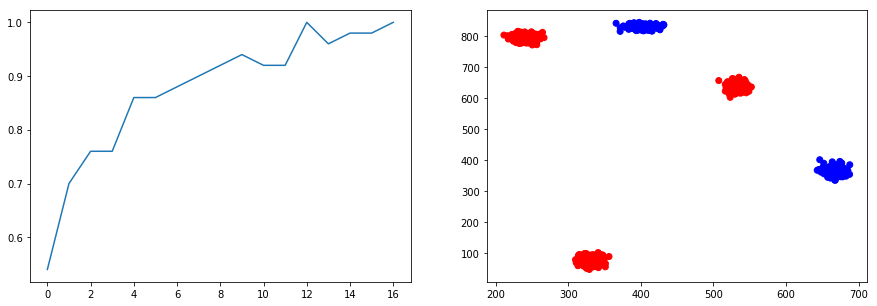

In [23]:
model = Sequential()
model.add(ly.Dense(units=12, activation='relu', input_dim=2))
model.add(ly.Dense(units=6, activation='relu'))
model.add(ly.Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from olac import data_generators

X_train, y_train = np.split(np.vstack(list(data_generators.cluster_generator())),[2],1)
X_test, y_test = np.split(np.vstack(list(data_generators.cluster_generator())),[2],1)
training_end = 200
model_hist = model.fit(X_train[:,:training_end], y_train[:,:training_end].astype(int), epochs=100, batch_size=20, verbose=0)
print(model_hist)
step_size = 50
steps = np.arange(training_end, len(X_train), step_size)
acc_list = []
for step in steps:
    prediction = np.round(model.predict(X_train[step : step+step_size]))
    model_hist = model.train_on_batch(X_train[step:step+step_size], y_train[step:step+step_size])
    acc = (prediction == y_train[step:step+step_size]).mean()
    acc_list.append(acc)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax1.plot(acc_list)
ax2.scatter(X_train[:, 0], X_train[:,1], color=[{0: 'r', 1: 'b', 2: 'b'}[n.item()] for n in y_train])

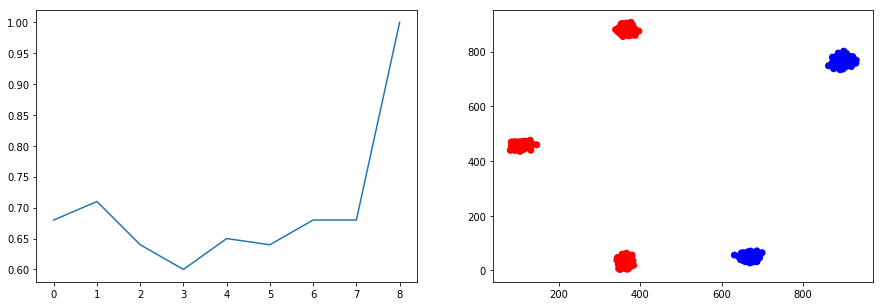

In [7]:
from olac import data_generators

X_train, y_train = np.split(np.vstack(list(data_generators.cluster_generator())),[2],1)
X_test, y_test = np.split(np.vstack(list(data_generators.cluster_generator())),[2],1)
training_end = 200
model_hist = model.fit(X_train[:,:training_end], y_train[:,:training_end].astype(int), epochs=100, batch_size=20, verbose=0)
step_size = 100
steps = np.arange(training_end, len(X_train), step_size)
acc_list = []
for step in steps:
    prediction = np.round(model.predict(X_train[step : step+step_size]))
    acc = (prediction == y_train[step:step+step_size]).mean()
    acc_list.append(acc)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax1.plot(acc_list)
ax2.scatter(X_train[:, 0], X_train[:,1], color=[{0: 'r', 1: 'b', 2: 'b'}[n.item()] for n in y_train])

In [8]:
acc_list

[0.68, 0.71, 0.64, 0.6, 0.65, 0.64, 0.68, 0.68, 1.0]

In [ ]:
vis.main(model, data_generators.roving_balls, 'accuracy', steps=40000, p_train=1, window=500, period=40000)

KeyboardInterrupt: 

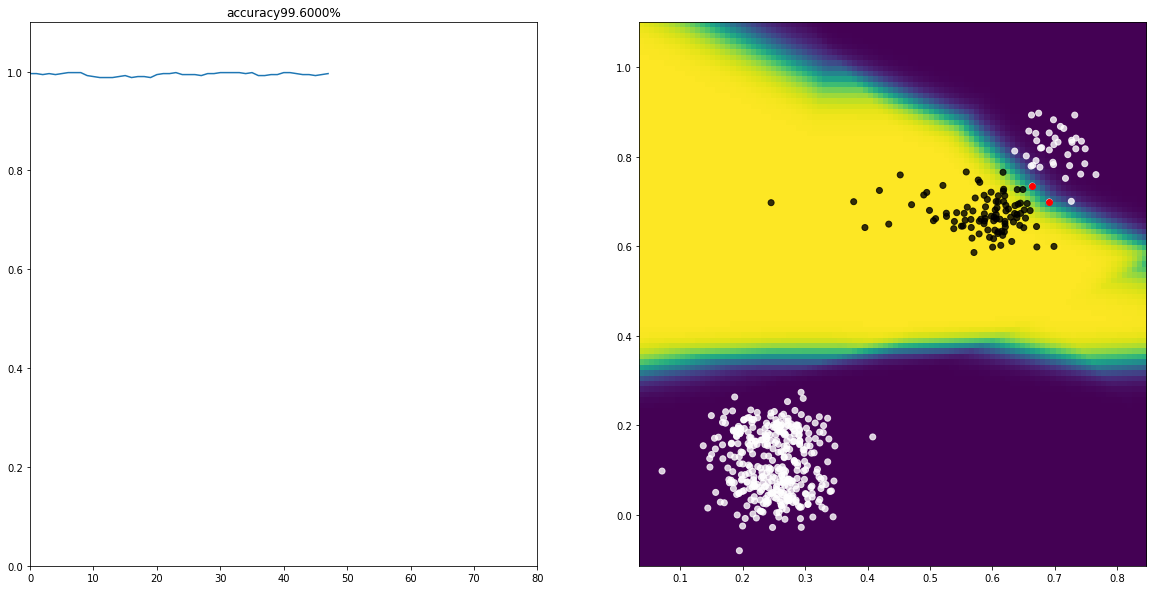

In [31]:
vis.main(model, data_generators.cluster_generator, 'accuracy', n_points=10000, cluster_width=50, p_train=10, window=500)

In [11]:
from olac import data_generators

X_train, y_train = np.split(np.vstack(list(data_generators.roving_balls(steps=10000))),[2],1)
X_test, y_test = np.split(np.vstack(list(data_generators.roving_balls(steps=1000))),[2],1)

model_hist = model.fit(X_train[:200], y_train[:200].astype(int), epochs=100, batch_size=20, verbose=0)

%timeit (model.predict(X_train[:500]))

2.45 ms ± 151 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
from olac import data_generators

X_train, y_train = np.split(np.vstack(list(data_generators.roving_balls(steps=10000))),[2],1)
X_test, y_test = np.split(np.vstack(list(data_generators.roving_balls(steps=1000))),[2],1)

model_hist = model.fit(X_train[:200], y_train[:200].astype(int), epochs=100, batch_size=20, verbose=0)

%timeit (model.predict(X_train[:500]))

2.45 ms ± 151 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
from numpy import array
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
data = data.reshape((1, 10, 1))
print(data.shape)

(1, 10, 1)


In [13]:
data

array([[[0.1],
        [0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9],
        [1. ]]])

In [14]:
X_train.shape

(5001, 2)

In [15]:
X_train.reshape(1,1001,2)

ValueError: cannot reshape array of size 10002 into shape (1,1001,2)